<a href="https://colab.research.google.com/github/sambhuyadav/Machine-Learning-Resources/blob/main/Two_Sample_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest



#-------------------------   Part 1: "Two Sample T Test (Independent Samples)"  -----------------------------

#Height Population Data

In [ ]:
#Load weight-height data

!gdown 12zss9SplRh1xr38o4WHOFJ0WRlpAJbrG

df = pd.read_csv("weight-height.csv")

print("\n\n")
df

Downloading...
From: https://drive.google.com/uc?id=12zss9SplRh1xr38o4WHOFJ0WRlpAJbrG
To: /content/weight-height.csv
100% 180k/180k [00:00<00:00, 56.1MB/s]





,Gender,Height,Weight
0,Male,73.8,241.9
1,Male,68.8,162.3
2,Male,74.1,212.7
3,Male,71.7,220.0
4,Male,69.9,206.3
...,...,...,...
9995,Female,66.2,136.8
9996,Female,67.1,170.9
9997,Female,63.9,128.5
9998,Female,69.0,163.9


In [ ]:
#Assigning Random Hats to people in df

df['Hat_Colour'] = np.random.choice(["Red","Blue"],size=len(df))

df.head()

,Gender,Height,Weight,Hat_Colour
0,Male,73.8,241.9,Red
1,Male,68.8,162.3,Blue
2,Male,74.1,212.7,Blue
3,Male,71.7,220.0,Red
4,Male,69.9,206.3,Blue


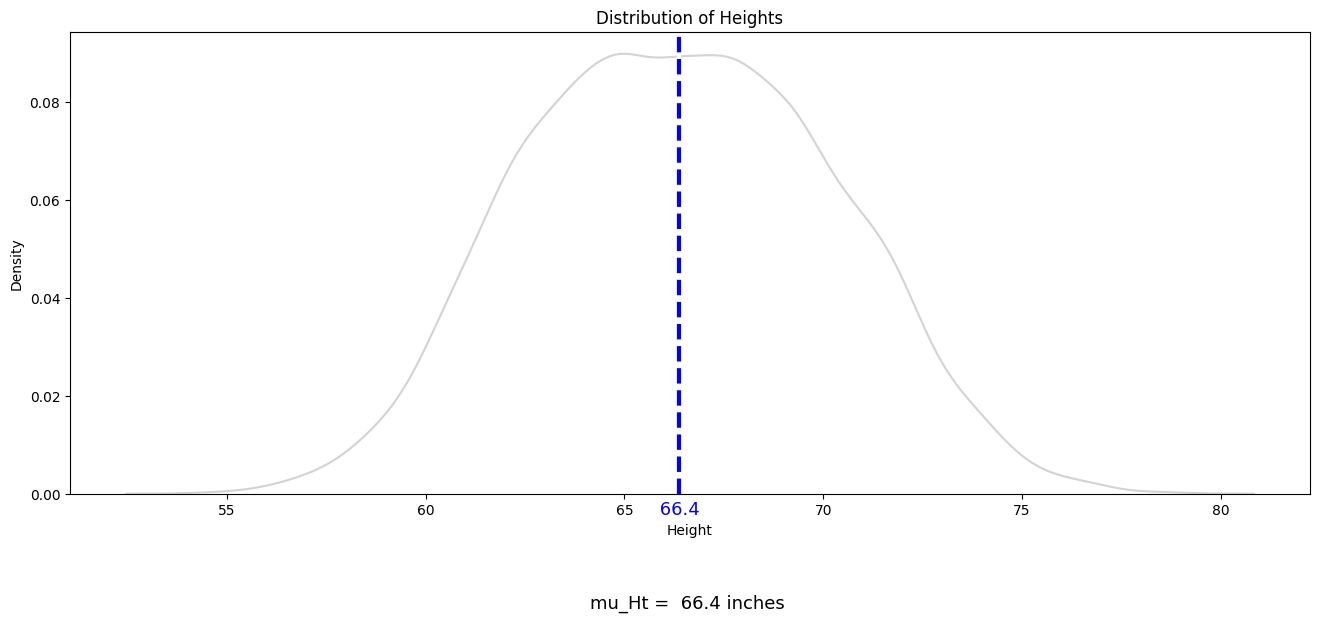

In [ ]:
#Plot the Distribution of Heights

plt.figure(figsize=(16,6))

mu_Ht = df['Height'].mean()

plt.title("Distribution of Heights")
sns.kdeplot(data=df, x='Height', color="lightgray")
plt.axvline(mu_Ht, color="blue", linewidth=3, linestyle='dashed', gapcolor="white")
plt.figtext(0.49, 0.075, f"{mu_Ht : .1f}", color="blue", fontsize=13)
plt.figtext(0.45, -0.08, f"mu_Ht = {mu_Ht : .1f} inches", color="black", fontsize=13)
plt.show()

##Splitting population heights by Gender

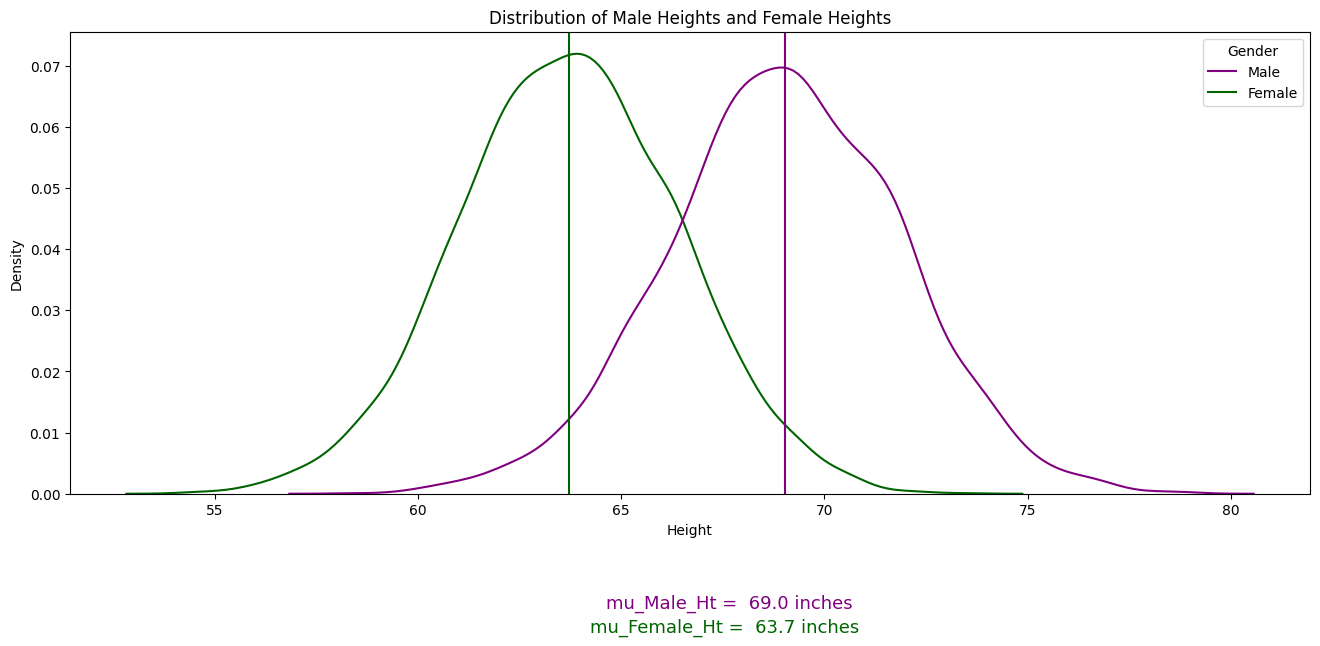

In [ ]:
#Plot the Distributions of Male Heights and Female Heights

plt.figure(figsize=(16,6))

male_height_mu = df[df["Gender"]=="Male"]["Height"].mean()
female_height_mu = df[df["Gender"]=="Female"]["Height"].mean()

plt.title("Distribution of Male Heights and Female Heights")

sns.kdeplot(data=df, x='Height', hue="Gender", palette={'Male':"purple", 'Female':"darkgreen"})

plt.axvline(male_height_mu, color="purple")
plt.axvline(female_height_mu, color="darkgreen")

plt.figtext(0.46, -0.08, f"mu_Male_Ht = {male_height_mu : .1f} inches", color="purple", fontsize=13)
plt.figtext(0.45, -0.12, f"mu_Female_Ht = {female_height_mu : .1f} inches", color="darkgreen", fontsize=13)

plt.show()

##Splitting population heights by hat_colour

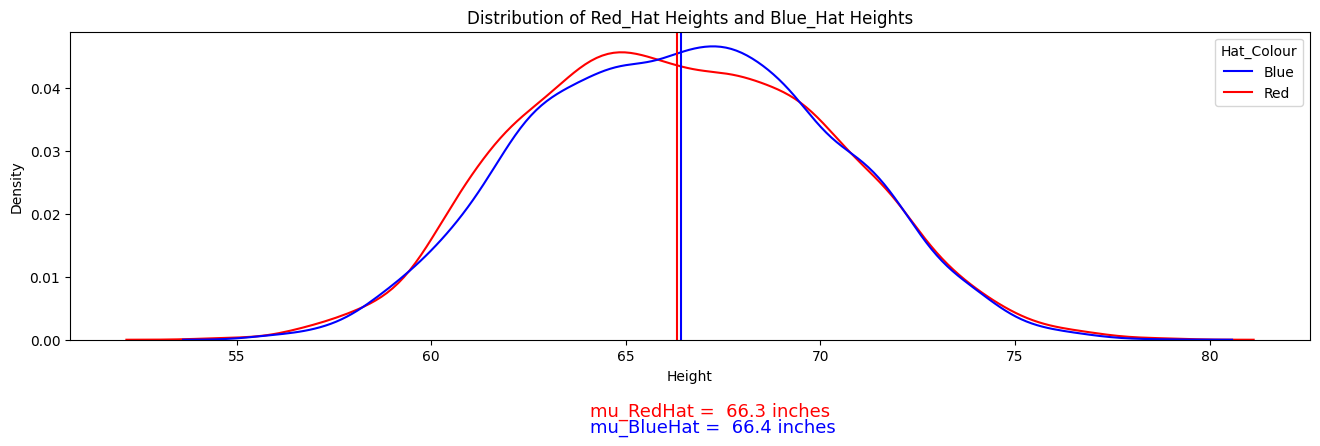

In [ ]:
#Plot the Distributions of Red_Hat Heights and Blue_Hat Heights

plt.figure(figsize=(16,4))

RedHat_height_mu = df[df["Hat_Colour"]=="Red"]["Height"].mean()
BlueHat_height_mu = df[df["Hat_Colour"]=="Blue"]["Height"].mean()

plt.title("Distribution of Red_Hat Heights and Blue_Hat Heights")

sns.kdeplot(data=df, x='Height', hue="Hat_Colour", palette={'Red':"red", 'Blue':"blue"})

plt.axvline(RedHat_height_mu, color="red")
plt.axvline(BlueHat_height_mu, color="blue")

plt.figtext(0.45, -0.08, f"mu_RedHat = {RedHat_height_mu : .1f} inches", color="red", fontsize=13)
plt.figtext(0.45, -0.12, f"mu_BlueHat = {BlueHat_height_mu : .1f} inches", color="blue", fontsize=13)

plt.show()

#Samples of Height measurements from the Population

In [ ]:
print(f"{'type of sample' : ^25} | {'sample mean' : ^15} | {'sample size' : ^15}")
print("-"*75)

#Sample of Male and Female Heights
sample_male = df[df["Gender"]=="Male"]["Height"].sample(10, random_state=12574)
sample_female = df[df["Gender"]=="Female"]["Height"].sample(13, random_state=33721)


print("\n\n")
print("-"*75)
print(f"{'sample_male_Ht' : ^25} | {sample_male.mean() : ^15.1f} | {len(sample_male) : ^15d}")
print("-"*75)
print(f"{'sample_female_Ht' : ^25} | {sample_female.mean() : ^15.1f} | {len(sample_female) : ^15d}")
print("-"*75)


#Sample of Red_Hat and Blue_Hat Heights
sample_RedHat = df[df["Hat_Colour"]=="Red"]["Height"].sample(11, random_state=85421)
sample_BlueHat = df[df["Hat_Colour"]=="Blue"]["Height"].sample(13, random_state=47409)

print("\n\n")
print("-"*75)
print(f"{'sample_RedHat_Ht' : ^25} | {sample_RedHat.mean() : ^15.1f} | {len(sample_RedHat) : ^15d}")
print("-"*75)
print(f"{'sample_BlueHat_Ht' : ^25} | {sample_BlueHat.mean() : ^15.1f} | {len(sample_BlueHat) : ^15d}")
print("-"*75)

     type of sample       |   sample mean   |   sample size  
---------------------------------------------------------------------------



---------------------------------------------------------------------------
     sample_male_Ht       |      68.7       |       10       
---------------------------------------------------------------------------
    sample_female_Ht      |      63.5       |       13       
---------------------------------------------------------------------------



---------------------------------------------------------------------------
    sample_RedHat_Ht      |      65.1       |       11       
---------------------------------------------------------------------------
    sample_BlueHat_Ht     |      64.8       |       13       
---------------------------------------------------------------------------


#Two-Sample T_Test in Python

In [ ]:
"""
  #T_test for two "Independent Samples"

  From scipy.stats, use the ttest_ind() function
  Ho: mu_1 = mu_2 (population means - from which samples are drawn - are similar)
  Ha:
      (a) mu_1 != mu_2 (if alternative = 'two-sided')
      (b) mu_1 < mu_2 (if alternative = 'less')
      (c) mu_1 > mu_2 (if alternative = 'greater')

  Inputs to the function:
    ttest_ind(a = sample_1, b = sample_2, alternative = 'less' / 'greater' / 'two-sided')

        Note:
          -> In the inputs, pass the full sample of data points as a list or array, not just the sample mean
          -> Default value of alternative = 'two-sided'

  Output of the function:
    A tuple containing (t_stat, p_value, degrees_of_freedom)
"""

from scipy import stats
#stats.ttest_ind(a = sample_1, b = sample_2, alternative = 'greater' / 'less' / 'two-sided')

In [ ]:
#male heights vs female heights

#Ho: mu_male = mu_female
#Ho: mu_male != mu_female ("two-sided")

from scipy import stats

stats.ttest_ind(a= sample_male, b= sample_female, alternative="two-sided")

#p-val = 0.03%
#alpha = 5%

#Decision: Reject Ho;
#there is a statistically significant difference in mu_male and mu_female

TtestResult(statistic=np.float64(4.271752224148016), pvalue=np.float64(0.0003392538115518004), df=np.float64(21.0))

In [ ]:
#male heights vs female heights

#Ho: mu_male >= mu_female
#Ha: mu_male < mu_female ("less")

from scipy import stats

stats.ttest_ind(a= sample_male, b= sample_female, alternative="less")

#p-val = 99.98%
#alpha = 5%

#Decision: Fail to Reject Ho;

TtestResult(statistic=np.float64(4.271752224148016), pvalue=np.float64(0.9998303730942241), df=np.float64(21.0))

In [ ]:
#male heights vs female heights

#Ho: mu_male <= mu_female
#Ha: mu_male > mu_female ("greater")

from scipy import stats

stats.ttest_ind(a= sample_male, b= sample_female, alternative="greater")

#p-val = 0.016%
#alpha = 5%

#Decision: Reject Ho;

TtestResult(statistic=np.float64(4.271752224148016), pvalue=np.float64(0.0001696269057759002), df=np.float64(21.0))

#---------------------   Part 2: "Two Sample T Test (Related Samples)"  --------------------------------------

#Two sample Relative t_test:

> Two samples with before-after pairs of values



In [ ]:
"""
Twelve cars were equipped with radial tyres,
and driven over a test course. Mileage was recorded.

Then the same 12 cars, (with the same drivers),
were equipped with regular belted tyres
and driven over the same test course.

After each run, the mileage (in km/l) was measured.
Is there evidence that radial tyres offer better mileage?

assume alpha = 0.05
"""

#first iteration
mileages_radial = [4.2,4.7,6.6,7.0,6.7,4.5,5.7,6.0,7.4,4.9,6.1,5.2]


#second iteration
mileages_belted = [4.1,4.9,6.2,6.9,6.8,4.4,5.7,5.8,6.9,4.7,6.0,4.9]

#Ho: mu_R = mu_B
#Ha: mu_R > mu_B ("greater")

#ttest_rel()
#RELATIVE ttest

stats.ttest_rel(a=mileages_radial, b =mileages_belted, alternative="greater")


TtestResult(statistic=np.float64(2.484515150684451), pvalue=np.float64(0.015164752831992123), df=np.int64(11))

#Extra quizzes

##Comparing Fertilizers

In [ ]:
"""
Determine whether there is a statistically significant difference in
the average heights of plants grown with fertilizer X and fertilizer Y.

Group A (Fertilizer X):
Heights = [162, 164, 168, 170, 174, 176, 180, 182, 186, 188, 192, 194, 198, 200, 204, 206, 210, 212, 216, 218, 222, 224, 228, 230, 234, 236, 240, 242, 246, 248, 252, 254, 258, 260, 264, 266, 270]

Group B (Fertilizer Y):
Heights = [158, 162, 166, 170, 174, 178, 182, 186, 190, 194, 198, 202, 206, 210, 214, 218, 222, 226, 230, 234, 238, 242, 246, 250, 254, 258, 262, 266, 270, 274, 278, 282, 286, 290, 294, 298, 302]


Significance Level (α): 0.1

"""

sample_group_A = [162, 164, 168, 170, 174, 176, 180, 182, 186, 188, 192, 194, 198, 200, 204, 206, 210, 212, 216, 218, 222, 224, 228, 230, 234, 236, 240, 242, 246, 248, 252, 254, 258, 260, 264, 266, 270]

sample_group_B = [158, 162, 166, 170, 174, 178, 182, 186, 190, 194, 198, 202, 206, 210, 214, 218, 222, 226, 230, 234, 238, 242, 246, 250, 254, 258, 262, 266, 270, 274, 278, 282, 286, 290, 294, 298, 302]


#Ho: mu_X = mu_Y
#Ha: mu_X !=  mu_Y ("two-sided")

stats.ttest_ind(a= sample_group_A, b=sample_group_B, alternative="two-sided" )

#p-val = 10.78%
#alpha = 10%

#Decision: Fail to reject Ho

TtestResult(statistic=np.float64(-1.6280691715301856), pvalue=np.float64(0.10787862863608348), df=np.float64(72.0))

##Girls vs Boys in the exam

In [ ]:


"""
In a school exam, the marks scored by boys and girls are recorded.
All marks are out of 100.

boys = [95, 78, 68, 95, 98, 79, 98, 86, 78, 89, 89, 94]
girls = [100, 100, 95, 90, 95, 98, 100, 100]

Perform 2 sample T-test to check the claim that
girls outperform boys, in this school test.

Assume significance level to be 5%.
"""

#Ho: mu_G <= mu_B
#Ha: mu_G > mu_B ("greater")

boys = [95, 78, 68, 95, 98, 79, 98, 86, 78, 89, 89, 94]
girls = [100, 100, 95, 90, 95, 98, 100, 100]

stats.ttest_ind(a=girls, b=boys, alternative="greater")


TtestResult(statistic=np.float64(2.7927752811778026), pvalue=np.float64(0.006010671109332002), df=np.float64(18.0))

##Pill that increases IQ scores

In [ ]:


"""
A pharma company claims to have invented a vitamin supplement pill
that increases the IQ of adolescents.

They randomly recruited volunteer 14-year-old teens
from across India for an experimental study.
The teens were given the pills for a period of 12 months.

Then, when the volunteers turned 15, their IQ scores were tested

samp_iq_scores = [110, 105, 98, 102, 99, 104, 115, 95]

A research paper on the Indian Statistical Institute website shows that
the average IQ scores for 15-year-old Indian teens is 101

Are the results by the Pharma company statistically significant w.r.t. their claim?
"""


#Ho: mu = 101
#Ha: mu > 101 ("greater")

samp_iq_scores = [110, 105, 98, 102, 99, 104, 115, 95]

stats.ttest_1samp(a=samp_iq_scores, popmean=101, alternative="greater")

TtestResult(statistic=np.float64(1.0765409408615139), pvalue=np.float64(0.1586912200009167), df=np.int64(7))

##Comparing Drug Recovery Times (in days)

In [ ]:
#Drug_1 vs Drug_2 Recovery times (in days)

!gdown 1juup-F609RSFKvZDR_H8XqXD0uPpO47M
drug_1_recovery_times = pd.read_csv('drug_1_recovery.csv')['drug_1']


!gdown 1hbk6hYY2rJEQOqkNEifcKirrPRh4AnTB
drug_2_recovery_times = pd.read_csv('drug_2_recovery.csv')['drug_2']

print("\n\n\n Success: both datasets loaded successfully into dataframes: \n -> drug_1_recovery_times, and \n -> drug_2_recovery_times")

Downloading...
From: https://drive.google.com/uc?id=1juup-F609RSFKvZDR_H8XqXD0uPpO47M
To: /content/drug_1_recovery.csv
100% 306/306 [00:00<00:00, 908kB/s]
Downloading...
From: https://drive.google.com/uc?id=1hbk6hYY2rJEQOqkNEifcKirrPRh4AnTB
To: /content/drug_2_recovery.csv
100% 379/379 [00:00<00:00, 1.55MB/s]



 Success: both datasets loaded successfully into dataframes: 
 -> drug_1_recovery_times, and 
 -> drug_2_recovery_times


In [ ]:
print(f"shape of drug_1_recovery_times= {drug_1_recovery_times.shape}\n\n")
print(f"mean recovery time for drug_1 = {drug_1_recovery_times.mean() : .1f} days\n\n\nFirst few rows:\n")

drug_1_recovery_times.head()

shape of drug_1_recovery_times= (100,)


mean recovery time for drug_1 =  6.6 days


First few rows:



,drug_1
0,8
1,7
2,7
3,7
4,6


In [ ]:
print(f"shape of drug_2_recovery_times= {drug_2_recovery_times.shape}\n\n")
print(f"mean recovery time for drug_2 = {drug_2_recovery_times.mean() : .1f} days\n\n\nFirst few rows:\n")

drug_2_recovery_times.head()

shape of drug_2_recovery_times= (120,)


mean recovery time for drug_2 =  7.6 days


First few rows:



,drug_2
0,9
1,7
2,8
3,7
4,4


In [ ]:
#Enter code here to find answer

pass